In [1]:
pip install geopy

37.005783 -121.568275 9.758020151911161
37.1305012 -121.6543901 3.281560249931917
37.238194 -121.989475 18.601699805064047
37.238194 -121.989475 22.375518818614356
37.238194 -121.989475 13.580764073628698
37.3229978 -122.0321823 23.920099413686245
37.3229978 -122.0321823 23.805978200728614
37.3229978 -122.0321823 7.371931472761042
37.335278 -121.891944 19.372959512098888
37.335278 -121.891944 16.080716257451975
37.335278 -121.891944 13.060913426474757
37.354107 -121.955238 22.476093844001884
37.354107 -121.955238 19.630110915049897
37.354107 -121.955238 9.348400691879297
37.384143664 -122.101 29.542205808514254
37.384143664 -122.101 27.83141210252093
37.384143664 -122.101 1.8506095011650208
37.386051 -122.083855 28.93095011271518
37.386051 -122.083855 26.91466276180297
37.386051 -122.083855 2.19020829178973
37.424107 -122.166077 34.05162332907001
37.424107 -122.166077 31.822776061513398
37.424107 -122.166077 3.2343400444411405
37.468319 -122.143936 35.26388854375564
37.468319 -122.1439

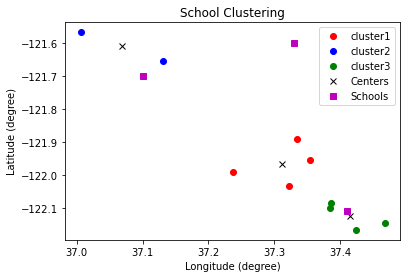

Cluster Center =  (37.3126442, -121.967209825)
Cluster - 1  =  4 and is closest to school  [  37.41 -122.11] distance =  10.337191804440014

Cluster Center =  (37.0681421, -121.61133255)
Cluster - 2  =  2 and is closest to school  [  37.1 -121.7] distance =  5.3687897792324915

Cluster Center =  (37.415655166, -122.123717)
Cluster - 3  =  4 and is closest to school  [  37.41 -122.11] distance =  0.8493841381611366



In [2]:
import numpy as np
import pandas as pd
from  matplotlib  import pyplot as plt  
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'your_app_name')
from geopy.distance import geodesic

x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []

# user supplied data points (udata)
udata = np.array([[37.005783, -121.568275], [37.1305012, -121.6543901], [37.238194, -121.989475],
 		     [37.3229978, -122.0321823], [37.335278, -121.891944], [37.354107,-121.955238],
         [37.384143664, -122.1010], [37.386051, -122.083855], [37.424107, -122.166077], [37.468319, -122.143936]])


#print(data[0][0])
#print(data[0][1])
#print(len(data))
data = []

schools = np.array([[37.100, -121.700], [37.330, -121.600], [37.410, -122.110]])
Slist = list(schools)                 # list of lists
MaxDist = 15 

# Below we will clean the user supplied data based on having maximum distacnce 
# between any data point and at least one of the schools.
for  sublist  in  udata :                 # sublist is one city/location
  lat = sublist[0]
  lng = sublist[1]
  # calculate the distance between (lat, lng) and every school, at least one
  # distance need to be less than MaxDist
  # if the data point qualifies save it into data[[]] otherwise skip it.
  for school in schools :
    flag = False
    city = (lat, lng)
    sch = (school[0], school[1])
    dist = geodesic(city, sch).miles
    print(lat, lng, dist)
    if dist > MaxDist :
      continue
    else :
      flag = True
      break
  if flag :
    data.append([lat, lng])               # data has qualified cities/locations

# data[[]] has qualified user data only
print(len(data))
print(data)

C = []                             # C is list of centroids for clusters
count = []

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(data)

# lbl is an array where entry represent the cluster # the 
# corresponding data[] belongs to
lbl = kmeans.labels_ 

# idx is a list of length = # of cities in the data list
# index = i into idx list represent city in the data[i] list
# idx[i] content = the cluster that the city belongs to
# data[i] represent a city and content of idx[i] is the corresponding cluster #
idx = list(lbl)                      # cast lbl to be a list 
#print(idx)

Cent = kmeans.cluster_centers_       # Center array for the clusters
#print("Cent = ", Cent)
# len(C) is the number of Centroids/Clusters
C = list(Cent) 
#print ("C = ", C)
print("length of C[] = ", len(C))         
#C = [[x,y], [z, k], [i,j]]
print("first Centroid = ", C[0][0], C[0][1])
print("second centroid = ", C[1][0], C[1][1])
print("third centroid = ", C[2][0], C[2][1])

#kmeans.predict([[1, 3], [8, 2], [17,2]])

#print(len(data))
print("idx = ", idx)
x1.clear()
y1.clear()
x2.clear()
y2.clear()
x3.clear()
y3.clear()

for i  in range (0, len(data)):
  if (idx[i] == 0):                             # 1st cluster
    x1.append(data[i][0])
    y1.append(data[i][1])
  elif (idx[i] == 1):                           # 2nd cluster
    x2.append(data[i][0])
    y2.append(data[i][1])
  else:
    x3.append(data[i][0])                       # 3rd cluster
    y3.append(data[i][1]) 
#print(x1)
#print(y1)
#print(x2)
#print(y2)
#print(x3)
#print(y3)
count.append( len(x1) )                         # count of cities in cluster-1
count.append( len(x2) )                         # count of cities in clutser-2
count.append( len(x3) )                         # count of cities in cluster-3
print("Count = ", count)

# plt.plot(x1, y1, marker='o', color= 'red')
plt.plot(x1, y1, 'ro', label= 'cluster1')
#
# Plotting cluster2
plt.plot(x2, y2, 'bo', label= 'cluster2')
#
# Plotting cluster3
# plt.plot(x3, y3, marker='o', color='green')
plt.plot(x3, y3, 'go', label = 'cluster3')
#
# Plot Centroids in black
plt.plot(C[0][0], C[0][1], 'kx', label = 'Centers')
plt.plot(C[1][0], C[1][1], 'kx' )
plt.plot(C[2][0], C[2][1], 'kx' )
#
# Plot schools in purple 
plt.plot(schools[0,0], schools[0,1], 'ms', label = 'Schools')
plt.plot(schools[1,0], schools[1,1], 'ms')
plt.plot(schools[2,0], schools[2,1], 'ms')
#
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
#
# Adding plot Legend
plt.legend()
plt.title('School Clustering')
plt.show()
#
# find shortest distance between each cluster center and any school
shortestDistance = 0 
curDistance = 0
j = 0                             # cluster center index in C list 
#print("Cluster centers = ", C)    
for cc in C :                     # for every cluster center
  x = cc[0]
  y = cc[1]
  clusterCenter = (x, y)
  print("Cluster Center = ", clusterCenter)
  sdsi = 0                        # shortest distance school index
  i = -1                          # index inthe schools list
  for school in Slist :
    i += 1
    sch = (school[0], school[1])
    if i == 0 :    
      #print("first school = ", sch, " clusterCenter = ", clusterCenter)
      shortestDistance = geodesic(clusterCenter, sch).miles
      #print(shortestDistance)
      continue
    else:
      #print("next school = ", sch, "clusterCenter =", clusterCenter)
      curDistance = geodesic(clusterCenter, sch).miles
      #print(curDistance)
      if curDistance < shortestDistance :
        shortestDistance = curDistance
        #print(shortestDistance)
        sdsi = i
  print("Cluster -", j+1, " = ", count[j], "and is closest to school ", schools[sdsi], "distance = ", shortestDistance)
  print()
  j += 1
  


#print("cluster1 = ", count1, "and is closest to School y" )
#print("cluster2 = ", count2)
#print("cluster3 = ", count3)


In [3]:
pip install geopy

In [4]:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'your_app_name')

In [5]:
from geopy.distance import geodesic

In [ ]:
Cairo = (30.033333, 31.233334)
Alexandria = (31.205753, 29.924526)
  
# Print the distance calculated in miles
print(geodesic(Cairo, Alexandria).miles)

112.26161633981152


In [8]:
Cairo = (30.033333, 31.233334)
Alexandria = (31.205753, 29.924526)
  
# Print the distance calculated in miles
print(geodesic(Cairo, Alexandria).miles)

112.26161633981152
